In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from itertools import product
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

import torch
import torch.nn as nn

""" 
9.3% of the population in the United States have diabetes , 28%
The cost of misclassification is high
"""

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', None)

seed = 12345

/Users/albert/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#read in clean data
csv_filename = 'dataset/clean_diabetic_dataset.csv'
csv_filename_2  = 'dataset/clean_diabetic_dataset_2nd.csv'
df = pd.read_csv(csv_filename_2)
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'service_utilization'],
      dtype='object')

In [61]:
y = df["readmitted"]
X = df.drop("readmitted",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, random_state=seed)




In [87]:

#neural network


X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values)
# X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
# y_val_tensor = torch.tensor(y_val)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        
        out = self.fc2(out)
        return out
    
input_size = 26  # Number of features in the input
num_classes = 2  # Number of output classes

# hyperparameters
hidden_sizes = [1,30,60,90,120,150] # Number of units in the hidden layer
num_epochs = [1,30,60,90,120,150]
learning_rates = [0.01,0.1,1,2]

hyperparameter_combinations = []
accuracy_scores = []
f1_scores = []
roc_scores = []

for hidden_size in hidden_sizes:
    for num_epoch in num_epochs:
        for learning_rate in learning_rates:
            torch.manual_seed(12345)
            model = NeuralNet(input_size, hidden_size, num_classes)
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
            criterion = nn.CrossEntropyLoss()
            for epoch in range(num_epoch):
                outputs = model(X_train_tensor )
                loss = criterion(outputs, y_train_tensor)
                
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
            with torch.no_grad():
                outputs = model(X_val_tensor)
                _, predicted = torch.max(outputs.data, 1)
                
            
            hyperparameter_combinations.append((hidden_size, num_epoch, learning_rate))
            
            accuracy = (predicted == y_val_tensor).sum().item() / len(y_val)
            accuracy_scores.append(accuracy)
            
            cur_f1_score = f1_score(predicted,y_val)
            f1_scores.append(cur_f1_score)
            
            roc_score = roc_auc_score(y_val,predicted)
            roc_scores.append(roc_score)
            
            
            print((hidden_size, epoch, learning_rate))

            
accuracy_scores = np.array(accuracy_scores)
f1_scores = np.array(f1_scores)
roc_scores = np.array(roc_scores)




# for size in hidden_sizes:
#     model = NeuralNet(input_size, size, num_classes)
#     optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#     for epoch in range(num_epochs):
#         # Forward pass
#         outputs = model(X_train_tensor )
#         loss = criterion(outputs, y_train_tensor)

#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

        # Print progress
#         if (epoch + 1) % 1 == 0:
#             print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
            


(1, 0, 0.01)
(1, 0, 0.1)
(1, 0, 1)
(1, 0, 2)
(1, 29, 0.01)
(1, 29, 0.1)
(1, 29, 1)
(1, 29, 2)
(1, 59, 0.01)
(1, 59, 0.1)
(1, 59, 1)
(1, 59, 2)
(1, 89, 0.01)
(1, 89, 0.1)
(1, 89, 1)
(1, 89, 2)
(1, 119, 0.01)
(1, 119, 0.1)
(1, 119, 1)
(1, 119, 2)
(1, 149, 0.01)
(1, 149, 0.1)
(1, 149, 1)
(1, 149, 2)
(30, 0, 0.01)
(30, 0, 0.1)
(30, 0, 1)
(30, 0, 2)
(30, 29, 0.01)
(30, 29, 0.1)
(30, 29, 1)
(30, 29, 2)
(30, 59, 0.01)
(30, 59, 0.1)
(30, 59, 1)
(30, 59, 2)
(30, 89, 0.01)
(30, 89, 0.1)
(30, 89, 1)
(30, 89, 2)
(30, 119, 0.01)
(30, 119, 0.1)
(30, 119, 1)
(30, 119, 2)
(30, 149, 0.01)
(30, 149, 0.1)
(30, 149, 1)
(30, 149, 2)
(60, 0, 0.01)
(60, 0, 0.1)
(60, 0, 1)
(60, 0, 2)
(60, 29, 0.01)
(60, 29, 0.1)
(60, 29, 1)
(60, 29, 2)
(60, 59, 0.01)
(60, 59, 0.1)
(60, 59, 1)
(60, 59, 2)
(60, 89, 0.01)
(60, 89, 0.1)
(60, 89, 1)
(60, 89, 2)
(60, 119, 0.01)
(60, 119, 0.1)
(60, 119, 1)
(60, 119, 2)
(60, 149, 0.01)
(60, 149, 0.1)
(60, 149, 1)
(60, 149, 2)
(90, 0, 0.01)
(90, 0, 0.1)
(90, 0, 1)
(90, 0, 2)
(90, 29, 

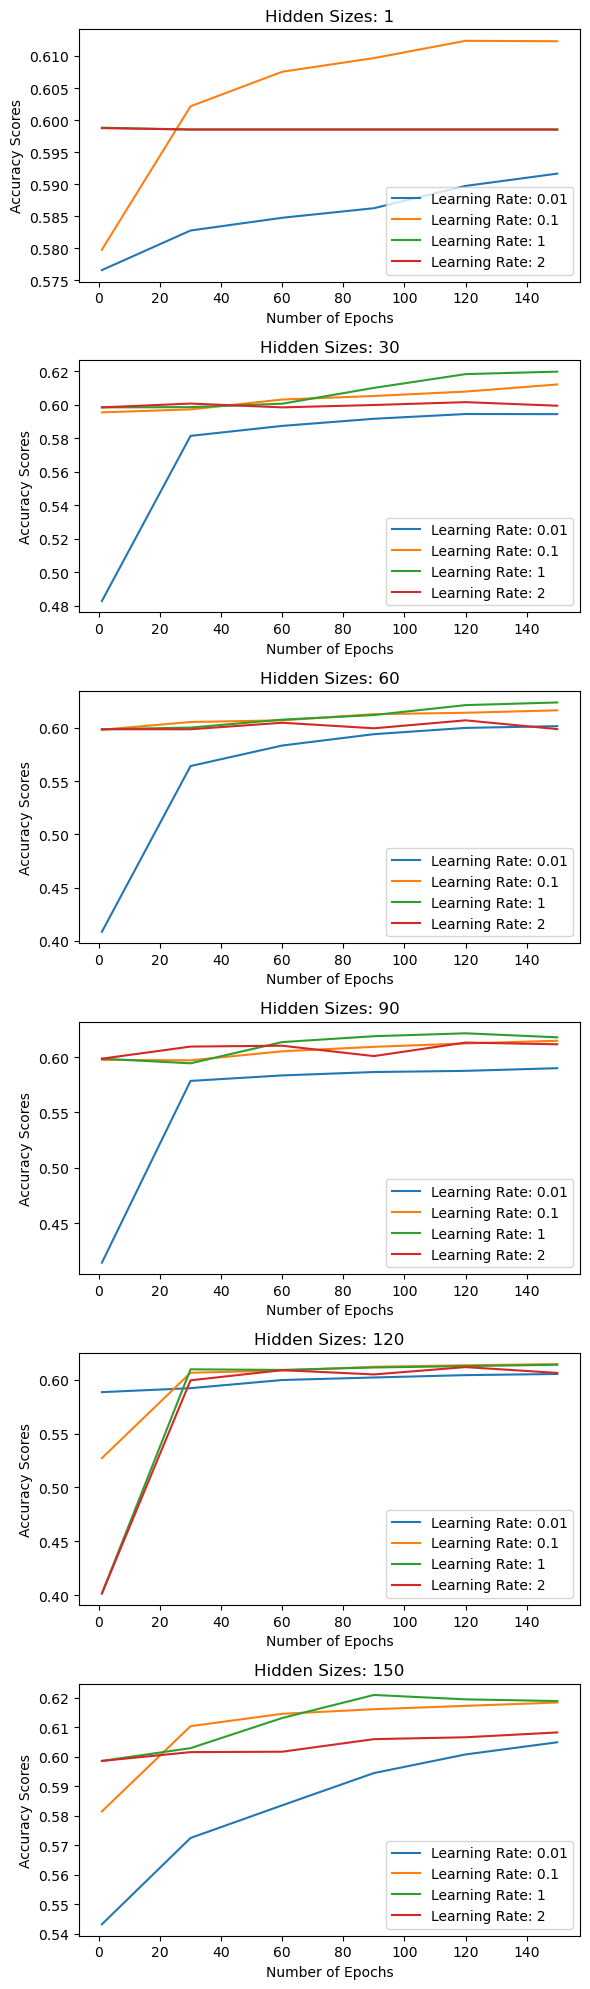

In [90]:
accuracy_scores = np.array(accuracy_scores)
hidden_sizes = [1,30,60,90,120,150]
num_epochs = [1,30,60,90,120,150]
learning_rates = [0.01,0.1,1,2]
accuracy_scores_reshaped = accuracy_scores.reshape(len(hidden_sizes), len(num_epochs), len(learning_rates))


fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(6, 20))

# Iterate over each parameter for each line graph
for i, parameter in enumerate(hidden_sizes):
    # Plot the line graph for each learning rate
    for j, learning_rate in enumerate(learning_rates):
        # Extract the accuracy scores for the current combination
        scores = accuracy_scores_reshaped[i, :, j]
        
        # Plot the line graph
        axes[i].plot(num_epochs, scores, label=f'Learning Rate: {learning_rate}')
    
    # Set the x-axis label
    axes[i].set_xlabel('Number of Epochs')
    
    # Set the y-axis label
    axes[i].set_ylabel('Accuracy Scores')
    
    # Set the title
    axes[i].set_title(f'Hidden Sizes: {parameter}')
    
    # Add a legend
    axes[i].legend()

plt.tight_layout()
plt.show()


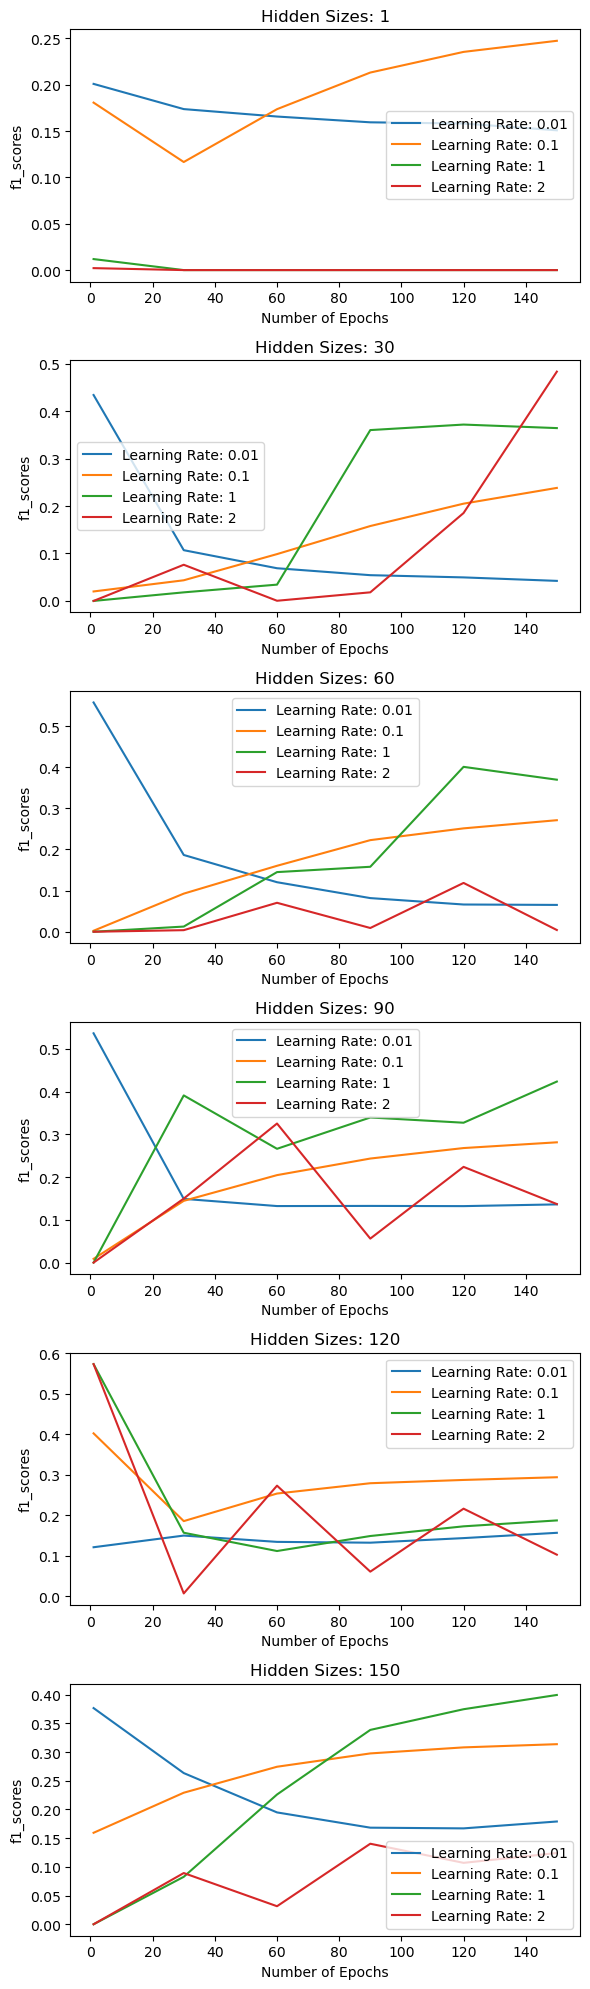

In [91]:
f1_scores_reshaped = f1_scores.reshape(len(hidden_sizes), len(num_epochs), len(learning_rates))
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(6, 20))
for i, parameter in enumerate(hidden_sizes):
    # Plot the line graph for each learning rate
    for j, learning_rate in enumerate(learning_rates):
        # Extract the accuracy scores for the current combination
        scores = f1_scores_reshaped[i, :, j]
        
        # Plot the line graph
        axes[i].plot(num_epochs, scores, label=f'Learning Rate: {learning_rate}')
    
    # Set the x-axis label
    axes[i].set_xlabel('Number of Epochs')
    
    # Set the y-axis label
    axes[i].set_ylabel('f1_scores')
    
    # Set the title
    axes[i].set_title(f'Hidden Sizes: {parameter}')
    
    # Add a legend
    axes[i].legend()

plt.tight_layout()
plt.show()

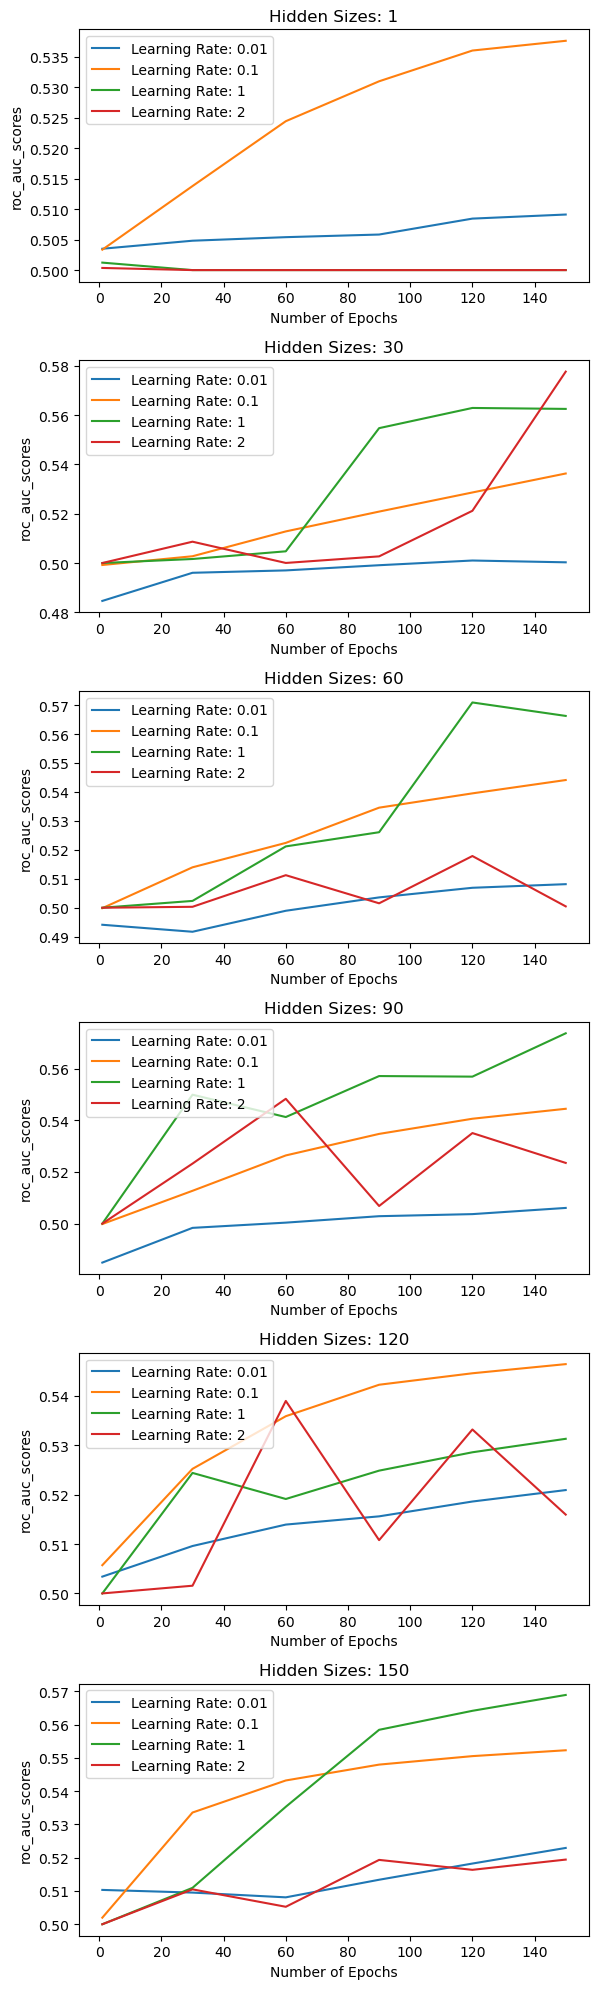

In [89]:
roc_scores_reshaped = roc_scores.reshape(len(hidden_sizes), len(num_epochs), len(learning_rates))
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(6, 20))
for i, parameter in enumerate(hidden_sizes):
    # Plot the line graph for each learning rate
    for j, learning_rate in enumerate(learning_rates):
        # Extract the accuracy scores for the current combination
        scores = roc_scores_reshaped[i, :, j]
        
        # Plot the line graph
        axes[i].plot(num_epochs, scores, label=f'Learning Rate: {learning_rate}')
    
    # Set the x-axis label
    axes[i].set_xlabel('Number of Epochs')
    
    # Set the y-axis label
    axes[i].set_ylabel('roc_auc_scores')
    
    # Set the title
    axes[i].set_title(f'Hidden Sizes: {parameter}')
    
    # Add a legend
    axes[i].legend()

plt.tight_layout()
plt.show()

In [92]:
hidden_size = 60
learning_rate = 1
epochs = 140
torch.manual_seed(12345)

model = NeuralNet(input_size, hidden_size, num_classes)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor )
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
#     if (epoch + 1) % 1 == 0:
#         print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)

# Calculate accuracy
accuracy = (predicted == y_test_tensor).sum().item() / len(y_test)

f1 = f1_score(predicted, y_test)
NN_confusion_matrix = confusion_matrix(predicted, y_test)
NN_classification_report = classification_report(predicted, y_test)
NN_roc_auc_score = roc_auc_score(predicted, y_test)

print("F1 score:", f1)
print("roc auc socre:\n", NN_roc_auc_score)
print(f'Test Accuracy: {accuracy:.4f}')

print("Confusion matrix:\n", NN_confusion_matrix)
print("Classification Report:\n", NN_classification_report)

F1 score: 0.3912651958577218
roc auc socre:
 0.5911544125423993
Test Accuracy: 0.6162
Confusion matrix:
 [[6943 3960]
 [1448 1738]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.64      0.72     10903
           1       0.31      0.55      0.39      3186

    accuracy                           0.62     14089
   macro avg       0.57      0.59      0.56     14089
weighted avg       0.71      0.62      0.65     14089



F1 score: 0.2225067577180253
Test Accuracy: 0.6121
